In [1]:
import numpy as np
import torch
from Embeddings import PreferenceEmbedding, ComplexPreference, EigenPreference, evaluate, train_on_func

In [2]:
func_square = lambda x: x.pow(2).sum(dim=1)
func_sphere       = lambda x: torch.dot(x, x)  # dimension: n
func_rosenbrock   = lambda x: torch.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)  # dimension: n
func_rastrigin    = lambda x: 10 * x.numel() + torch.sum(x**2 - 10 * torch.cos(2 * torch.pi * x))  # dimension: n
func_ackley       = lambda x: (
        -20 * torch.exp(-0.2 * torch.sqrt(torch.mean(x**2)))
        - torch.exp(torch.mean(torch.cos(2 * torch.pi * x)))
        + 20
        + torch.exp(torch.tensor(1.0))
)  # dimension: n
func_himmelblau   = lambda x: (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2  # dimension: 2

In [20]:
func = func_rastrigin
factor = 2
sizes = [256, 128, 64]

In [21]:
p_model = PreferenceEmbedding(2, factor=factor, sizes=sizes)
c_model = ComplexPreference(2, factor=factor, sizes=sizes, branches=1)
e_model = EigenPreference(2, factor=factor, sizes=sizes)

In [22]:
for model in [p_model, c_model]:#, e_model]:
    print("-"*20)
    train_on_func(model, func, epochs=100, lr=0.01, patience=100)
    evaluate(model, func)

--------------------
Epoch 010 — loss: 0.662292
Epoch 020 — loss: 0.684868
Epoch 030 — loss: 0.684495
Epoch 040 — loss: 0.680221
Epoch 050 — loss: 0.677587
Epoch 060 — loss: 0.671927
Epoch 070 — loss: 0.668643
Epoch 080 — loss: 0.683719
Epoch 090 — loss: 0.682707
Accuracy : 0.5362
Precision: 0.6788
Recall   : 0.1310
F1-score : 0.2196
ROC-AUC  : 0.6046
Confusion Matrix:
[[23548  1544]
 [21645  3263]]
--------------------
Epoch 010 — loss: 0.692491
Epoch 020 — loss: 0.690273
Epoch 030 — loss: 0.666692
Epoch 040 — loss: 0.680099
Epoch 050 — loss: 0.700496
Epoch 060 — loss: 0.682792
Epoch 070 — loss: 0.689391
Epoch 080 — loss: 0.690019
Epoch 090 — loss: 0.673040
Accuracy : 0.7335
Precision: 0.8045
Recall   : 0.6178
F1-score : 0.6989
ROC-AUC  : 0.8277
Confusion Matrix:
[[21213  3757]
 [ 9567 15463]]


In [16]:
import matplotlib.pyplot as plt

In [23]:
r = c_model.radii
t = c_model.angles
space = torch.linspace(-1, 1, 15)
X, Y = torch.meshgrid(space, space, indexing='xy')
points = torch.stack([X.flatten(), Y.flatten()], dim=1)
c = [func(x) for x in points]

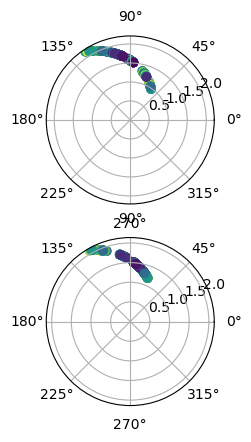

In [25]:
radii = r(points).detach()
angles = r(points).detach()
fig, axs = plt.subplots(2, subplot_kw={'projection': 'polar'})
for i in range(2):
    axs[i].scatter(angles[:,i], radii[:,i], c=c)
    axs[i].scatter(angles[:,i], radii[:,i], c=c)

In [31]:
func_square(X).detach()

tensor(68.0135)